In [1]:
import sys
sys.path.append("../code/")
APPLIANCES_ORDER = ['aggregate', 'hvac1','hvac2', 'hvac3', 'fridge1', 'fridge2', 'mw', 'dw', 'wm', 'oven1','oven2', 'wh','dr','range']
APPLIANCES_USE = ['aggregate', 'hvac','fridge','dr', 'dw', 'mw']

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tensor = np.load('./14-appliances-hourly-input-2015.npy')
homeid = np.load("./14-appliances-hourly-input-2015-homeids.npy").tolist()
#tensor= np.load('../1H-input.npy')

In [4]:
dataid = np.load("./homeid_10_hourly.npy")
validid = np.load("./valid_homes_index.npy")
valid_dataid = dataid[validid]

In [5]:
len(validid)

68

In [10]:
validid

array([  1,   5,  13,  18,  20,  22,  26,  27,  38,  43,  44,  47,  49,
        51,  57,  60,  64,  70,  77,  81,  93,  97, 126, 141, 145, 148,
       160, 165, 169, 170, 173, 176, 180, 184, 187, 192, 202, 203, 209,
       210, 211, 212, 215, 218, 221, 223, 229, 231, 232, 240, 244, 247,
       254, 255, 256, 266, 271, 276, 280, 285, 286, 289, 291, 292, 307,
       308, 315, 316])

In [11]:
valid_dataid

array([ 114,  661, 2018, 2575, 2814, 2859, 3456, 3482, 5403, 6836, 6990,
       7536, 7940, 8236, 9134, 8188, 2156, 4220, 7951, 2094,   93,  871,
       9737, 7863, 1169, 1415, 3367, 3723, 4373, 4526, 5395, 5921, 7627,
       7850, 8156, 9982, 4514, 7117, 8956, 9248, 9278, 4874, 7641, 8292,
       4946, 4957, 2242, 5568, 3036, 9701,  434, 1507, 7901, 6101, 8565,
       6063,  781, 2532, 5317,  101, 3916, 1310, 3273, 9912, 3413, 2361,
       5809,  668])

In [9]:
for i in valid_dataid:
    print(homeid.index[i])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [10]:
# subtract additional hvac from aggregate readings
subtract_tensor = np.ones([68, 6, 112, 24])
start, num_days = 160, 112

c = 0
for id in valid_dataid:
#     print(homeid.index(id))
#     id = 2018
    home_energy = tensor[homeid.index(id), :, start:start+num_days].copy()
    print(c, id)
    print(home_energy[0][1])
    # subtract additional hvac
    home_energy[0] = home_energy[0] - np.nan_to_num(home_energy[2]) - np.nan_to_num(home_energy[3])
    # subtract additional fridge
    home_energy[0] = home_energy[0] - np.nan_to_num(home_energy[5])
    print(home_energy[0][1])
    subtract_tensor[c][0] = home_energy[0] #aggregate
    subtract_tensor[c][1] = home_energy[1] #hvac
    subtract_tensor[c][2] = home_energy[4] #fridge
    subtract_tensor[c][3] = home_energy[12] #dr
    subtract_tensor[c][4] = home_energy[7] #dw
    subtract_tensor[c][5] = home_energy[6] #mw
    c += 1

0 114
[ 4170.31689453  2615.81665039   844.7333374    382.4666748    704.86663818
   477.68331909   795.79998779  1984.31665039  1150.33337402  2125.06665039
  1955.61669922  2025.41662598  2536.69995117  4338.93310547  2482.38330078
  2597.80004883  3107.58325195  5191.33349609  2020.34997559  1969.2833252
  1688.81665039  1723.06665039  1663.06665039  1387.51672363]
[ 4170.31689453  2615.81665039   844.7333374    382.4666748    704.86663818
   477.68331909   795.79998779  1984.31665039  1150.33337402  2125.06665039
  1955.61669922  2025.41662598  2536.69995117  4338.93310547  2482.38330078
  2597.80004883  3107.58325195  5191.33349609  2020.34997559  1969.2833252
  1688.81665039  1723.06665039  1663.06665039  1387.51672363]
1 661
[ 2598.23339844  4566.39990234  4379.63330078  4337.25        2563.30004883
   976.0166626    925.31665039   508.1499939    521.29998779   595.25
  1378.43334961  1741.90002441  2524.55004883  2268.13330078  2986.51660156
  3204.93334961  3334.93334961  2574

In [11]:
# summing up additional hvac and fridge readings
sum_tensor = np.ones([68, 6, 112, 24])
start, num_days = 160, 112

c = 0
for id in valid_dataid:
#     print(homeid.index(id))
#     id = 2018
    home_energy = tensor[homeid.index(id), :, start:start+num_days].copy()
    print(c, id)
    # for hvac
    home_energy[1] = np.nan_to_num(home_energy[1]) + np.nan_to_num(home_energy[2]) + np.nan_to_num(home_energy[3])
    # for fridge
    home_energy[4] = np.nan_to_num(home_energy[4]) + np.nan_to_num(home_energy[5])
    
    sum_tensor[c][0] = home_energy[0] #aggregate
    sum_tensor[c][1] = home_energy[1] #hvac
    sum_tensor[c][2] = home_energy[4] #fridge
    sum_tensor[c][3] = home_energy[12] #dr
    sum_tensor[c][4] = home_energy[7] #dw
    sum_tensor[c][5] = home_energy[6] #mw
    c += 1

0 114
1 661
2 2018
3 2575
4 2814
5 2859
6 3456
7 3482
8 5403
9 6836
10 6990
11 7536
12 7940
13 8236
14 9134
15 8188
16 2156
17 4220
18 7951
19 2094
20 93
21 871
22 9737
23 7863
24 1169
25 1415
26 3367
27 3723
28 4373
29 4526
30 5395
31 5921
32 7627
33 7850
34 8156
35 9982
36 4514
37 7117
38 8956
39 9248
40 9278
41 4874
42 7641
43 8292
44 4946
45 4957
46 2242
47 5568
48 3036
49 9701
50 434
51 1507
52 7901
53 6101
54 8565
55 6063
56 781
57 2532
58 5317
59 101
60 3916
61 1310
62 3273
63 9912
64 3413
65 2361
66 5809
67 668


In [12]:
np.save("../2015-5appliances-subtract-true-agg.npy", subtract_tensor)
np.save("../2015-5appliances-sum-true-agg.npy", sum_tensor)

In [57]:
origin_tensor = np.load("../2015-5appliances-true-agg.npy")

In [55]:
cluster3 = [2, 22, 29, 39, 45, 46, 51, 60]

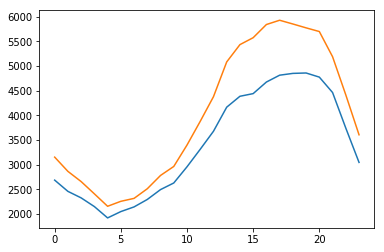

In [56]:
ax = pd.Series(subtract_tensor[cluster3, 0].mean(axis=0).mean(axis=0)).plot()
pd.Series(sum_tensor[cluster3, 0].mean(axis=0).mean(axis=0)).plot(ax=ax)

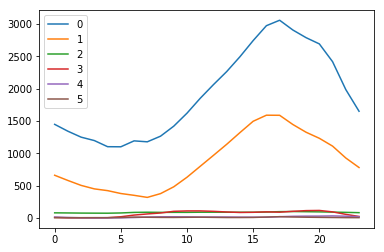

In [41]:
pd.DataFrame(subtract_tensor.mean(axis=0).mean(axis=1)).T.plot()

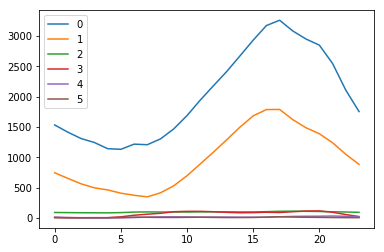

In [42]:
pd.DataFrame(sum_tensor.mean(axis=0).mean(axis=1)).T.plot()

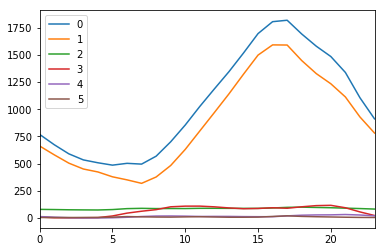

In [312]:
pd.DataFrame(t_all.mean(axis=0).mean(axis=1)).T.plot()

In [304]:
daily_trend = t_all.mean(axis=2)
daily_trend.shape

(68, 6, 24)

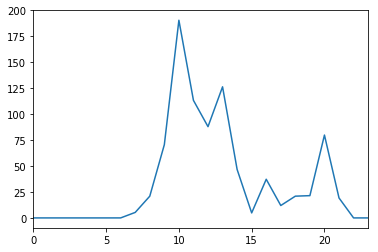

In [308]:
pd.Series(daily_trend[2,3, :]).plot()

In [401]:
train_data = daily_trend[:30,:,:]
test_data = daily_trend[30:,:,:]

### Zero baseline

#### Always predict trends for each appliance as 0


In [402]:
zero_baseline_pred = np.zeros_like(test_data[:,1:,:])

In [403]:
from sklearn.metrics import mean_absolute_error

In [404]:
mae_zero = {}
for appliance_num, appliance in enumerate(APPLIANCES_ORDER[1:]):
    mae_zero[appliance] = mean_absolute_error(test_data[:,appliance_num+1 , :], zero_baseline_pred[:,appliance_num,:])

In [405]:
zero_res = pd.Series(mae_zero)

### Mean baseline

#### Predict the test as the mean of the train set

In [406]:
mean_baseline_pred = np.zeros_like(zero_baseline_pred)
mean_baseline_pred[:] = np.mean(train_data[:,1:,:], axis=0)

In [407]:
mean_baseline_pred.shape

(22, 6, 24)

In [408]:
mae_mean = {}
for appliance_num, appliance in enumerate(APPLIANCES_ORDER[1:]):
    mae_mean[appliance] = mean_absolute_error(test_data[:,appliance_num+1 , :], mean_baseline_pred[:,appliance_num,:])

In [409]:
mean_res = pd.Series(mae_mean)

### KNN on only aggregate features

In [410]:
from sklearn.neighbors import KNeighborsRegressor
pred_knn = {}


for appliance_num in range(6):
    pred_knn[appliance_num]={}
    # Learn for each appliance separately
    train_x = train_data[:, 0, :]
    train_y = train_data[:, appliance_num+1, :]
    for num_neighbours in range(1, 10):
        knn = KNeighborsRegressor(num_neighbours)
        knn.fit(train_x, train_y)
        pred_knn[appliance_num][num_neighbours]=knn.predict(test_data[:,0,:])

In [411]:
mae_knn = {}
for appliance_num, appliance in enumerate(APPLIANCES_ORDER[1:]):
    mae_knn[appliance] = {}
    for num_neighbours in range(1, 10):
       
        mae_knn[appliance][num_neighbours] = mean_absolute_error(test_data[:,appliance_num+1 , :],pred_knn[appliance_num][num_neighbours])

In [412]:
knn_res = pd.DataFrame(mae_knn).min()

In [413]:
from tensorly.decomposition import robust_pca

In [414]:
t_data = daily_trend.copy()
t_data[30:, 1:, :] = np.NaN
low_rank_part, sparse_part = robust_pca(daily_trend, mask=~np.isnan(t_data))

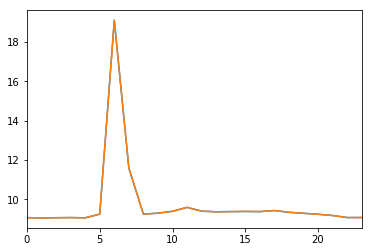

In [415]:
pd.Series(low_rank_part[0, 6, :]).plot()
pd.Series(daily_trend[0, 6, :]).plot()

In [416]:
from tensor_custom_core import stf_3dim, stf_4dim_time, ttf_3dim

In [417]:
pred_stf ={}
for r in range(1, 10):
    H, A, T = stf_3dim(t_data,r=r, num_iter=300)
    print(r)
    pred_stf[r] = np.einsum('Hr, Ar, Tr -> HAT', H, A, T)[30:, 1:, :]

748.985956228 0
183.86764206 50
182.659333663 100
182.639860331 150
182.639474007 200
182.639465931 250
1
747.270319504 0
176.761477579 50
118.42793254 100
117.312421066 150
117.283346445 200
117.279050193 250
2
745.574046267 0
148.039187511 50
103.105081708 100
97.9021139476 150
97.3991786237 200
97.288978086 250
3
743.81472284 0
134.802589031 50
90.2807925767 100
86.9845750076 150
85.6593847643 200
85.2013091163 250
4
742.857914897 0
111.169024538 50
88.321845036 100
82.6895365108 150
79.0772035332 200
77.4583123916 250
5
741.442897321 0
117.0961147 50
88.8196675217 100
77.1923992061 150
71.8278872442 200
68.0964627739 250
6
737.923986052 0
126.167064194 50
82.3480773853 100
71.8085862814 150
64.8357184577 200
61.9264144216 250
7
737.979004875 0
109.969612142 50
80.8437756988 100
67.452332255 150
62.1369933406 200
59.6791183699 250
8
734.711830687 0
112.483500393 50
80.5519501483 100
63.6967092919 150
56.8326907015 200
53.2851838858 250
9


In [418]:
mae_stf = {}
for appliance_num, appliance in enumerate(APPLIANCES_ORDER[1:]):
    mae_stf[appliance] = {}
    for r in range(1, 10):
       
        mae_stf[appliance][r] = mean_absolute_error(test_data[:,appliance_num+1 , :],pred_stf[r][:,appliance_num, :])

In [419]:
stf_results = pd.DataFrame(mae_stf).min()

In [420]:
pred_ttf ={}
for h in range(1, 9):
    pred_ttf[h] = {}
    for t in range(1, 10):
        H, A, T = ttf_3dim(t_data,h=h,t=t, num_iter=200)
        print(h, t)
        pred_ttf[h][t] = np.einsum('Hh, hAt, tT ->HAT', H, A, T)[30:, 1:, :]

748.985956228 0
183.86764206 50
182.659333663 100
182.639860331 150
1 1
747.528857001 0
182.607574628 50
182.063725349 100
181.776790156 150
1 2
745.759531525 0
182.537301702 50
181.983890008 100
181.661052093 150
1 3
744.286701568 0
182.639154576 50
182.430141623 100
181.888173711 150
1 4
742.90402306 0
182.560682699 50
182.10277439 100
181.676959426 150
1 5
741.195512051 0
182.580420908 50
182.216618628 100
181.688446438 150
1 6
739.54171975 0
182.501615385 50
182.051887276 100
181.686546725 150
1 7
738.044669579 0
182.470344562 50
181.907649868 100
181.564769341 150
1 8
736.538378962 0
182.363559402 50
181.765565281 100
181.535824955 150
1 9
747.186609647 0
182.761900702 50
182.599341997 100
182.471208737 150
2 1
743.58117233 0
182.61286034 50
182.368739767 100
181.771518871 150
2 2
741.011273744 0
182.610834474 50
182.330769239 100
181.790589147 150
2 3
737.662319173 0
182.638976302 50
182.505669072 100
182.069410666 150
2 4
733.662187202 0
182.544606172 50
182.090603785 100
181.57

In [426]:
mae_ttf = {}
for appliance_num, appliance in enumerate(APPLIANCES_ORDER[1:]):
    mae_ttf[appliance] = {}
    for h in range(1, 9):
        mae_ttf[appliance][h] = {}
    
        for t in range(1, 10):
            mae_ttf[appliance][h][t] = mean_absolute_error(test_data[:,appliance_num+1 , :],pred_ttf[h][t][:, appliance_num,:])

In [427]:
ttf_results = pd.Panel(mae_ttf).min().min()

In [100]:
H, A, T = ttf_3dim(t_data,h=1,t=6, num_iter=200)

741.195512051 0
182.580420908 50
182.216618628 100
181.688446438 150


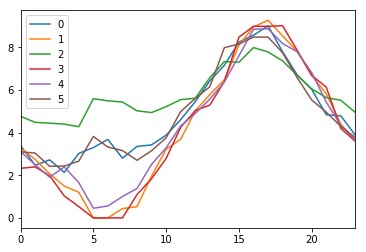

In [101]:
pd.DataFrame(T).T.plot()

In [105]:
H, A, T = stf_3dim(t_data,r=6, num_iter=200)

741.442897321 0
117.0961147 50
88.8196675217 100
77.1923992061 150


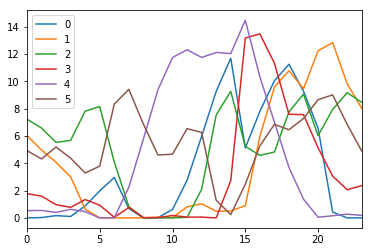

In [106]:
pd.DataFrame(T).plot()

In [381]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, rowLabels=data.index, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


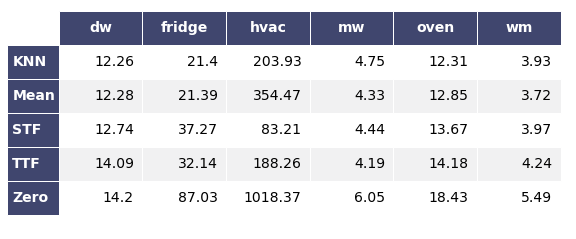

In [99]:
render_mpl_table(main_results.T.round(2), col_width=1.5)
plt.savefig("/Users/nipun/Desktop/res.png")

In [81]:
main_results.T

dw     fridge         hvac        mw       oven        wm
KNN   12.255020  21.401373   203.931686  4.748065  12.309966  3.934995
Mean  12.276006  21.391676   354.473620  4.325235  12.845249  3.721154
STF   12.741937  37.273678    83.214018  4.444634  13.665692  3.972031
TTF   14.087367  32.135128   188.260544  4.186200  14.176298  4.236309
Zero  14.201703  87.032838  1018.370834  6.054502  18.429772  5.492065

In [23]:
train_data.shape

(30, 7, 24)

In [92]:
from sklearn.decomposition import PCA
pc = {}
for n_components in [1,]:
    pc[n_components] = []
    for a in range(1,7):
       
        pca = PCA(n_components=n_components)
        pca.fit(train_data[:, a, :])
        pc[n_components].append(pca.components_)

In [94]:
T = np.array(pc[n_components]).reshape(6*n_components, -1)

In [95]:
E = test_data[:, 0, :]
E.shape

(22, 24)

In [96]:
T.shape

(6, 24)

In [98]:
H = np.linalg.lstsq(T.transpose(), E.transpose())[0].T

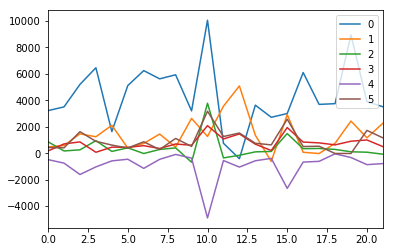

In [105]:
pd.DataFrame(H).plot()

In [108]:
T.shape

(6, 24)

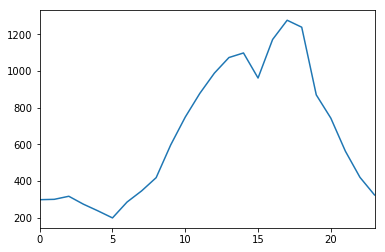

In [126]:
pd.Series(H[13, 0]*T[0, :]).plot()

In [391]:
from sklearn.decomposition import NMF

mf = {}
preds = {}
err_pca_mf = {}
for n_components in range(1, 7):
    preds[n_components] = {}
    mf[n_components] = []
    err_pca_mf[n_components] = {}
    for a in range(1,7):
       
        model = NMF(n_components=n_components, init='random', random_state=0)
        W = model.fit_transform(train_data[:, a, :])
        H = model.components_


        mf[n_components].append(H)
    T = np.array(mf[n_components]).reshape(6*n_components, -1)
    H = nnls_autograd(T, E, case=2, lr=5, num_iter=1000)
    for appliance_num in range(6):
        preds[n_components][APPLIANCES_ORDER[1:][appliance_num]] = np.dot(H[:,appliance_num*n_components:(appliance_num+1)*n_components ], T[appliance_num*n_components:(appliance_num+1)*n_components ,:])
        err_pca_mf[n_components][APPLIANCES_ORDER[1:][appliance_num]] = mean_absolute_error(test_data[:, appliance_num+1, :], preds[n_components][APPLIANCES_ORDER[1:][appliance_num]])

948.608630612 0
276.73486351 10
243.930395146 20
233.245736782 30
227.12407583 40
223.188579309 50
220.510405312 60
218.440513113 70
217.02263453 80
216.079194298 90
215.452056214 100
215.081861675 110
214.62674463 120
214.286548122 130
213.99063346 140
213.720413138 150
213.473923701 160
213.243882668 170
213.027446583 180
212.822519876 190
212.633791896 200
212.489257989 210
212.354316646 220
212.227393703 230
212.107376593 240
211.993397631 250
211.884775533 260
211.780975677 270
211.681582489 280
211.586273292 290
211.494771064 300
211.406747171 310
211.32170881 320
211.23906739 330
211.158486849 340
211.080063496 350
211.004032061 360
210.930466686 370
210.859351725 380
210.791321124 390
210.725749371 400
210.662421032 410
210.601159998 420
210.541820187 430
210.484278196 440
210.428427928 450
210.374176794 460
210.321442997 470
210.270153541 480
210.220243885 490
210.171658846 500
210.124341518 510
210.078240542 520
210.048040218 530
210.023585554 540
210.00132738 550
209.9809956

87.5743260668 620
87.5000152098 630
87.4271264781 640
87.3557696031 650
87.2867383768 660
87.2241376485 670
87.2189222949 680
87.438637915 690
87.1462000812 700
86.9766762936 710
86.9128088276 720
86.8584956485 730
86.8054990416 740
86.7536895728 750
86.7035079504 760
86.663187603 770
87.0725100876 780
86.8650294571 790
86.5122357009 800
86.4583783562 810
86.4111793059 820
86.3646124301 830
86.3185788211 840
86.2787924211 850
86.2465595539 860
86.2149571284 870
86.1838729442 880
86.153249894 890
86.1230469212 900
86.0932372614 910
86.0638015352 920
86.0352024156 930
86.0089058338 940
85.9836502694 950
85.9590930895 960
85.9351072255 970
85.9116245856 980
85.8885994193 990
773.774229015 0
195.145780893 10
143.958309973 20
129.685388556 30
116.760374946 40
106.592726664 50
101.694160403 60
96.7360838695 70
94.7981722771 80
92.7457117543 90
90.5586503295 100
91.1486305145 110
87.9248575513 120
87.2588820086 130
86.0404190069 140
84.0203895283 150
83.1893318808 160
82.4318793772 170
81.777

In [424]:
mf_pca_results = pd.DataFrame(err_pca_mf).round().min(axis=1)
mf_pca_results

dw         33.0
fridge    106.0
hvac      195.0
mw         39.0
oven       29.0
wm         13.0
dtype: float64

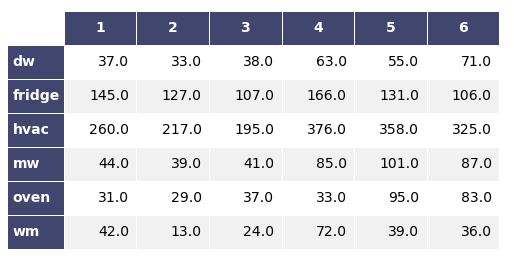

In [393]:
render_mpl_table(pd.DataFrame(err_pca_mf).round(), col_width=1.3)
plt.savefig("/Users/nipun/Desktop/mf-pca.png")

In [428]:
main_results = pd.DataFrame({"STF":stf_results, "TTF":ttf_results,
                             "Zero":zero_res, "Mean":mean_res,
                            "KNN":knn_res, "PCA":mf_pca_results})

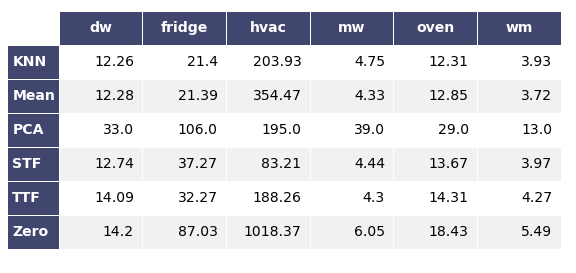

In [430]:
render_mpl_table(main_results.T.round(2), col_width=1.5)
plt.savefig("/Users/nipun/Desktop/res.png")

In [384]:
def nnls_autograd(A, B, case=1, num_iter=300, eps=1e-8, lr=4):
    """
    Case 1: Ax = B
    Case 2: xA = B
    """
    
    import autograd.numpy as np
    np.random.seed(0)
    from autograd import grad
    
    if case==1:
        def cost(A, B, x):

            error = A@x - B
            return np.sqrt((error ** 2).mean())
    else:
        def cost(A, B, x):

            error = x@A - B
            return np.sqrt((error ** 2).mean())
        
    
    mg = grad(cost, argnum=2)
    
    M, N = B.shape
    
    if case==1:
        r = A.shape[1]
        x = np.abs(np.random.randn(r, N))
    else:
        r = A.shape[0]
        x = np.abs(np.random.randn(M, r))
  
    sum_x =  np.zeros_like(x)
    
    for i in range(num_iter):
        del_x = mg(A, B, x)
        sum_x += eps + np.square(del_x)
        lr_x = np.divide(lr, np.sqrt(sum_x))
        x -= lr_x * del_x
        
        x[x<0]=0.
        
        if i % 10 == 0:
            print(cost(A, B, x), i)
            sys.stdout.flush()

    return x    

In [359]:
H.shape, T.shape

((22, 30), (30, 24))

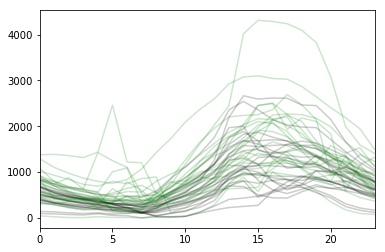

In [361]:
appliance_num=0
ax = pd.DataFrame(H[:, n_components*appliance_num:n_components*(appliance_num+1)]@T[n_components*appliance_num:n_components*(appliance_num+1), :]).T.plot(color='k',alpha=0.2, legend=False)

pd.DataFrame(test_data[:, 1, :]).T.plot(color='g',alpha=0.2, legend=False,ax=ax)

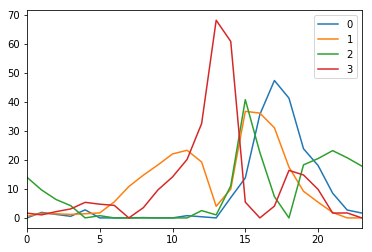

In [362]:
pd.DataFrame(T[0:4]).T.plot()

In [363]:
T.shape, H.shape

((30, 24), (22, 30))

In [364]:
preds = {}
for appliance_num in range(6):
    preds[appliance_num] = np.dot(H[:,appliance_num*n_components:(appliance_num+1)*n_components ], T[appliance_num*n_components:(appliance_num+1)*n_components ,:])

324.962573579 0
128.415405616 1
73.0839735032 2
53.5526775808 3
33.2588812001 4
78.0731149302 5


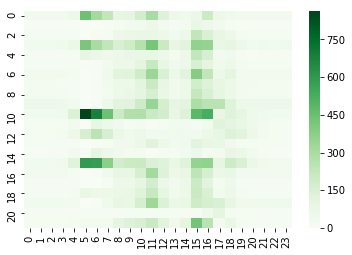

In [372]:
import seaborn as sns
sns.heatmap(preds[2],cmap='Greens')

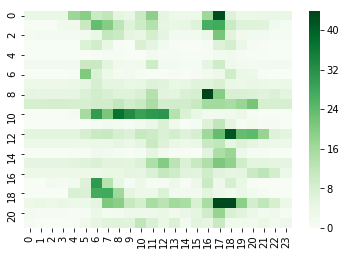

In [373]:
sns.heatmap(test_data[:, 3, :],cmap='Greens')

In [316]:
(preds[1] - test_data[:, 2, :]).mean()

403.37396872065591

In [317]:
test_data.shape

(22, 7, 24)

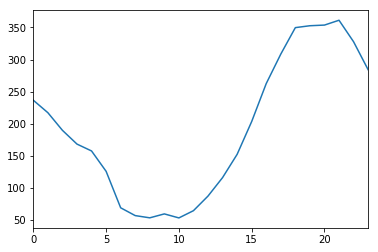

In [320]:
pd.Series(preds[1][0]).plot()

In [160]:
def cost(E, H, T):
    return np.abs(E-H*T)

In [161]:
from autograd import grad

In [162]:
grad_f = grad(cost, argnum=[0,1,2])

In [ ]:
H = np.random.randn()

In [84]:
import subprocess
filename = 'out.tex'
pdffile = 'out.pdf'
outname = 'out.png'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(bytes(template.format(main_results.to_latex()),'UTF-8'))

subprocess.call(['pdflatex', filename])
subprocess.call(['convert', '-density', '300', pdffile, '-quality', '90', outname])

FileNotFoundError: [Errno 2] No such file or directory: 'convert': 'convert'

In [443]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(train_data[:, 1, :])  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

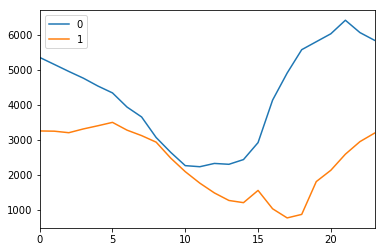

In [447]:
(pd.DataFrame(A_)+4000).plot()